# Part_4 Klik - MODELE!!
19:50

https://www.researchgate.net/post/What_methods_are_suitable_for_feature_selection_to_improve_classification_accuracy

https://www.researchgate.net/post/What_methods_are_suitable_for_feature_selection_to_improve_classification_accuracy


In [1]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Tue Mar 24 22:22:37 2020


# <div class="alert-danger">Przegub</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df3 = pd.read_csv('/home/wojciech/Pulpit/4/kliki_uczenie2.csv', usecols = ['klik','CYF_baner_pozycja'])
print(df3.columns)
print(df3.shape)

Index(['klik', 'CYF_baner_pozycja'], dtype='object')
(3619621, 2)


# Analiza ważności danych PCA

### <span style="color:pink">Dołączam do zbioru

### <span style="color:blue">Wybór zmiennych do analizy</span>

### Usuwanie wartości NaN

In [3]:
print("1: ",df3.shape)
df3 = df3.dropna(how='any')
print(df3.isnull().sum())
print("2: ",df3.shape)

1:  (3619621, 2)
klik                 0
CYF_baner_pozycja    0
dtype: int64
2:  (3619621, 2)


In [4]:
df3.dtypes

klik                 int64
CYF_baner_pozycja    int64
dtype: object

# <span style="color:green"> Filtrowanie

### <span style="color:blue">Podział na zbiór testowy i wynikowy</span>

In [2]:
y = df3['klik']
X = df3.drop('klik', axis=1)

In [3]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (2425146, 1)
Zbiór X testowy:     (1194475, 1)
Zbiór y treningowy:  (2425146,)
Zbiór y testowy:     (1194475,)


### <span style="color:blue">OVERSAMPLING</span>

In [4]:
print("ytrain = 0: ", sum(ytrain == 0))
print("ytrain = 1: ", sum(ytrain == 1))

ytrain = 0:  2013743
ytrain = 1:  411403


In [5]:
Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
Proporcja = np.round(Proporcja, decimals=0)
Proporcja = Proporcja.astype(int)
print('Ilość -0 klik na -1 klik: ', Proporcja)

Ilość -0 klik na -1 klik:  5


In [6]:
ytrain_OV = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
ytrain_OV.count()

2057015

Powiękrzyliśmy ilość zmiennych wynikowych 1. Teraz mamy tę samą liczbę wierszy zmiennych wynikowych i zmiennych niezależnych. Teraz wprowadzamy nowe, dodatkowe zmienne 1 do zbioru treningowego.

In [7]:
Xtrain_OV = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
ytrain_OV.count()

2057015

In [8]:
ytrain_OV = pd.concat([ytrain, ytrain_OV], axis = 0).reset_index(drop = True)
Xtrain_OV = pd.concat([Xtrain, Xtrain_OV], axis = 0).reset_index(drop = True)

#print("ilość elementów w zbiorze Xtrain:     ", Xtrain.CYF_data_godzina.count())
#print("ilość elementów w zbiorze Xtrain_OV:  ", Xtrain_OV.CYF_data_godzina.count())
print("ilość elementów w zbiorze ytrain:     ", ytrain.count())
print("ilość elementów w zbiorze ytrain_OV:  ", ytrain_OV.count())

ilość elementów w zbiorze ytrain:      2425146
ilość elementów w zbiorze ytrain_OV:   4482161


Poziom zbilansowania zbioru wynikowego:

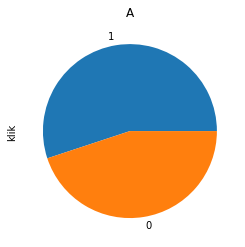

In [11]:
ytrain_OV.value_counts(dropna = False, normalize=True).plot(kind='pie',title='A')

In [13]:
Xtest.isnull().sum()

CYF_baner_pozycja    0
dtype: int64

In [40]:
def oversampling(ytrain, Xtrain):
    import matplotlib.pyplot as plt
       
    
    print("y = 0: ", sum(ytrain == 0))
    print("y = 1: ", sum(ytrain == 1))
    print('--------------------------------------------------------')
    
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    print()
    
    Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
    Proporcja = np.round(Proporcja, decimals=0)
    Proporcja = Proporcja.astype(int)
        
    ytrain_OV = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
    Xtrain_OV = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
    
    ytrain_OV = pd.concat([ytrain, ytrain_OV], axis = 0).reset_index(drop = True)
    Xtrain_OV = pd.concat([Xtrain, Xtrain_OV], axis = 0).reset_index(drop = True)
    
    
    print("Before oversampling Xtrain:     ", Xtrain.shape)
    print("Before oversampling ytrain:     ", ytrain.shape)
    print('--------------------------------------------------------')
    print("After oversampling Xtrain_OV:  ", Xtrain_OV.shape)
    print("After oversampling ytrain_OV:  ", ytrain_OV.shape)
    print('--------------------------------------------------------')
        
    ax = plt.subplot(1, 2, 1)
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    ax = plt.subplot(1, 2, 2)
    ytrain_OV.value_counts(dropna = False, normalize=True).plot(kind='pie',title='After oversampling')
    plt.show

y = 0:  2013743
y = 1:  411403
--------------------------------------------------------

Before oversampling Xtrain:      (2425146, 1)
Before oversampling ytrain:      (2425146,)
--------------------------------------------------------
After oversampling Xtrain_OV:   (4482161, 1)
After oversampling ytrain_OV:   (4482161,)
--------------------------------------------------------


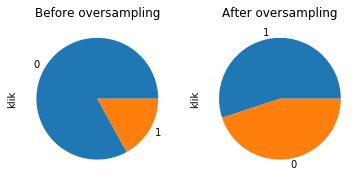

In [38]:
oversampling(ytrain, Xtrain)

## Współczynnik korelacji

In [14]:
CORREL = df3.corr().sort_values('klik')
CORREL['klik']

CYF_baner_pozycja    0.023893
klik                 1.000000
Name: klik, dtype: float64

Text(0, 0.5, 'Zmienne nezależne ciągłe')

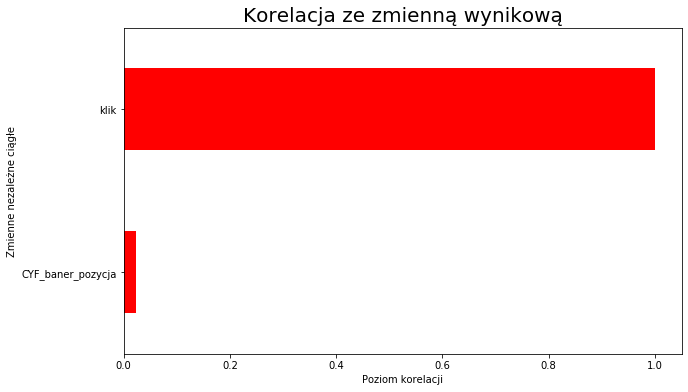

In [15]:
CORREL = df3.corr().sort_values('klik')

plt.figure(figsize=(10,6))
CORREL['klik'].plot(kind='barh', color='red')
plt.title('Korelacja ze zmienną wynikową', fontsize=20)
plt.xlabel('Poziom korelacji')
plt.ylabel('Zmienne nezależne ciągłe')

## Standaryzacja

# # <span style="color:blue"> Model regresji logistycznej ze słabą siatką GRID</span>

In [16]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid.fit(Xtrain_OV, ytrain_OV) 
y_pred_LRC = LR_Grid.predict(Xtest)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall Training data:      1.0
Precision Training data:   0.5507
----------------------------------------------------------------------
Recall Test data:          1.0
Precision Test data:       0.1696
----------------------------------------------------------------------
Confusion Matrix Test data
[[     0 991844]
 [     0 202631]]
----------------------------------------------------------------------


/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    991844
           1       0.17      1.00      0.29    202631

    accuracy                           0.17   1194475
   macro avg       0.08      0.50      0.15   1194475
weighted avg       0.03      0.17      0.05   1194475



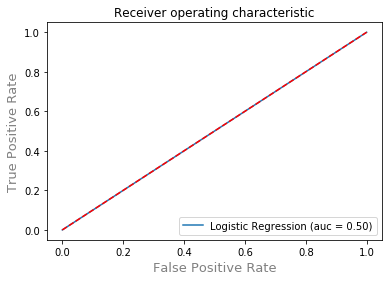

auc 0.5


In [17]:
# ocena modelu
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain_OV, LR_Grid.predict(Xtrain_OV)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain_OV, LR_Grid.predict(Xtrain_OV)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, LR_Grid.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, LR_Grid.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, LR_Grid.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, LR_Grid.predict(Xtest)))
y_pred_proba = LR_Grid.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_LRC)
auc = metrics.roc_auc_score(ytest, y_pred_LRC)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()
print('auc',auc)

https://stackoverflow.com/questions/39163354/evaluating-logistic-regression-with-cross-validation

# <span style="color:blue"> Model regresji RandomForest</span>

## <span style="color:blue">Naive Bayes Classifier</span>

In [18]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(Xtrain_OV, ytrain_OV)

GaussianNB(priors=None, var_smoothing=1e-09)

y_pred_NBC = NBC.predict(Xtest)

Recall Training data:      1.0
Precision Training data:   0.5507
----------------------------------------------------------------------
Recall Test data:          1.0
Precision Test data:       0.1696
----------------------------------------------------------------------
Confusion Matrix Test data
[[     0 991844]
 [     0 202631]]
----------------------------------------------------------------------


/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    991844
           1       0.17      1.00      0.29    202631

    accuracy                           0.17   1194475
   macro avg       0.08      0.50      0.15   1194475
weighted avg       0.03      0.17      0.05   1194475



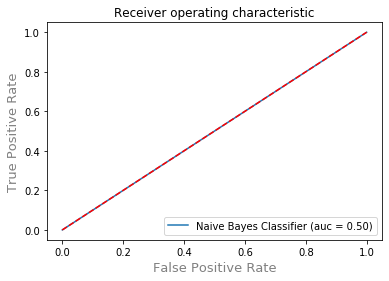

auc 0.5


In [19]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

#Ocena modelu:
print("Recall Training data:     ", np.round(recall_score(ytrain_OV, NBC.predict(Xtrain_OV)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain_OV, NBC.predict(Xtrain_OV)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, NBC.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, NBC.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, NBC.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, NBC.predict(Xtest)))
y_pred_proba = NBC.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_NBC)
auc = metrics.roc_auc_score(ytest, y_pred_NBC)
plt.plot(fpr, tpr, label='Naive Bayes Classifier (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()
print('auc',auc)

## <span style="color:blue">4. Random Forest Classifier - with pipeline GridSearchCV</span>

In [20]:
print('Pomiar czasu wykonania tego zadania')
print('Minut: ',(time.time() - start_time)/60) ## koniec pomiaru czasu

Pomiar czasu wykonania tego zadania
Minut:  0.9650676091512044
